In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



from sklearn.metrics import roc_curve, auc

pd.set_option('display.max_columns', None)

In [ ]:
#drop base_egg_steps
#binning experience growth, capture rate
pokemon = pd.read_csv('pokemon_bin_1.csv')
pokemon.head()

In [ ]:
pokemon.isnull().sum()

against_bug              0
against_dark             0
against_dragon           0
against_electric         0
against_fairy            0
against_fight            0
against_fire             0
against_flying           0
against_ghost            0
against_grass            0
against_ground           0
against_ice              0
against_normal           0
against_poison           0
against_psychic          0
against_rock             0
against_steel            0
against_water            0
attack                   0
base_happiness           0
base_total               0
defense                  0
height_m                 0
hp                       0
name                     0
sp_attack                0
sp_defense               0
speed                    0
type1                    0
type2                    0
weight_kg                0
is_legendary             0
capture_rate_bin         0
experience_growth_bin    0
dtype: int64

In [ ]:
pokemon = pokemon.set_index('name')
pokemon.head()

In [ ]:
df = pd.get_dummies(pokemon)

In [ ]:
df

In [ ]:
X, y = df.drop(['is_legendary'], axis = 1), df['is_legendary']
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size = 0.7, test_size = 0.3, stratify = y)
y.value_counts()

0    731
1     70
Name: is_legendary, dtype: int64

# PCA on Imbalanced Data

The first PCA is to help us find the best components that explains 85% of the variance data

In [ ]:
#PCA Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [ ]:
#Application of PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(X_scaled)

PCA()

In [ ]:
#Explaining Eigenvalues & Explained Variance
print("Eigenvalues:")
print(pca.explained_variance_)
print()

print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Eigenvalues:
[6.30094880e+00 4.63343802e+00 3.74427356e+00 3.23451196e+00
 3.01228490e+00 2.76357141e+00 2.56506116e+00 2.26954505e+00
 2.16608953e+00 2.03928502e+00 1.78463722e+00 1.76554126e+00
 1.67880499e+00 1.56135955e+00 1.50126718e+00 1.42003180e+00
 1.40452288e+00 1.37625523e+00 1.27431501e+00 1.25300376e+00
 1.22133265e+00 1.21242957e+00 1.18804833e+00 1.14173018e+00
 1.09974915e+00 1.09098359e+00 1.06946276e+00 1.04985962e+00
 1.03169481e+00 1.00824527e+00 9.84950220e-01 9.68878686e-01
 9.48601977e-01 9.16969554e-01 9.11581103e-01 8.55824280e-01
 8.24713586e-01 8.05870019e-01 7.79711634e-01 7.35854846e-01
 6.87864976e-01 6.55235983e-01 6.29021041e-01 5.98786490e-01
 4.87918094e-01 4.39806065e-01 4.08870405e-01 3.31603015e-01
 2.97540374e-01 2.19490213e-01 1.18625468e-01 9.37063123e-02
 7.54659447e-02 6.57670285e-02 6.12130816e-02 5.43840299e-02
 5.02904542e-02 4.03642122e-02 3.34652212e-02 3.27843941e-02
 2.81041092e-02 2.47625637e-02 1.79567816e-02 1.38508139e-02
 1.23976706

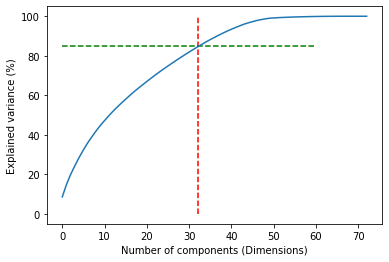

In [ ]:
# Making the scree line plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")
plt.vlines(x=32, ymax=100, ymin=0, colors="r", linestyles="--")
plt.hlines(y=85, xmax=60, xmin=0, colors="g", linestyles="--")

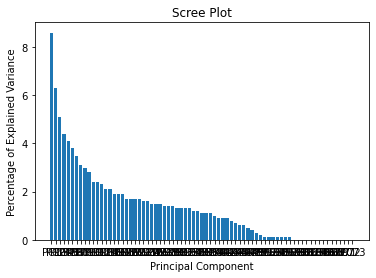

In [ ]:
# Making the scree bar plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

Both in the line plot as well as the bar plot we can see that at the mark of explaining 85% variance, we see the PCA component at around 32. We will choose 32 PCA components to move forward. 

In [ ]:
#Apply 32 Components to PCA for modeling
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Apply PCA
pca = PCA(n_components=32)
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca)

In [ ]:
print(X_pca.head())
print(X_pca.shape)

          0         1         2         3         4         5         6  \
0 -2.614865 -1.987341  1.715193 -0.955572 -2.091284  0.161767  2.183150   
1 -1.616256 -2.334243  1.827652 -0.749695 -2.178553 -0.221974  2.320969   
2  1.179774 -3.096308  2.191844 -0.406674 -2.573777 -1.207446  2.700807   
3 -1.377007  1.803514  0.020996  2.241160 -0.197506  0.336891  0.481825   
4 -0.225537  1.402151  0.144841  2.477221 -0.284597 -0.088777  0.642352   

          7         8         9        10        11        12        13  \
0  0.111931  0.163823 -0.028209 -1.454852 -0.341929 -1.393433 -2.450951   
1  0.002667  0.174828 -0.470419 -1.423801 -0.447280 -1.386886 -2.446920   
2 -0.269482 -0.097722 -1.464804 -1.463856 -0.716374 -1.361131 -2.330551   
3  0.874626  2.831437 -0.494105 -0.234686  1.714289 -0.244844  0.384198   
4  0.747307  2.840820 -0.990058 -0.217778  1.573379 -0.236624  0.419294   

         14        15        16        17        18        19        20  \
0  0.804995 -0.039655 -

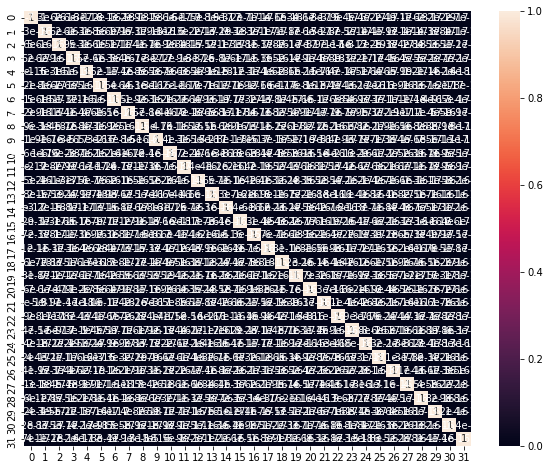

In [ ]:
#Checking all correlations of the PCA Feature data to make sure no correlation exists
fig = plt.figure(figsize=(10, 8))
sns.heatmap(X_pca.corr(), 
            annot=True)

PCA is able to transfer all correlated features into all non-correlated features

In [ ]:
# Make train and test sets based on PCA
train_X_pca, test_X_pca, train_y, test_y = train_test_split(X_pca, y, train_size = 0.7, test_size = 0.3, stratify = y)

In [ ]:
train_X = train_X_pca
test_X = test_X_pca

In [ ]:
#define functions for classifiers

from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")
def classifier(model):
    
    clf = model
    clf.fit(train_X, train_y)
    y_pred = clf.predict(test_X)
    
    kf=KFold(n_splits=5)
    cv_score=cross_val_score(clf,train_X,train_y,cv=kf)
    acc_score = accuracy_score(test_y, y_pred)
    
    print("Cross Validation Scores are {}".format(cv_score))
    print("Average Cross Validation score :{}".format(cv_score.mean()))
    #print(confusion_matrix(test_y, y_pred))
    print(classification_report(test_y, y_pred))
    print("accuracy: ", acc_score)
    return clf, acc_score, cv_score.mean()

In [ ]:
#define functions for comparing RMSE

from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import cross_val_score

def compare_RMSE(model,train_X,train_y,test_X,test_y):
    
    # test
    test_rmse = mean_squared_error(test_y, model.predict(test_X), squared=False)
    print(f"Test set RMSE:", test_rmse)

    # cv
    MSE_CV_scores = - cross_val_score(model, train_X, train_y, cv=10, 
                                      scoring='neg_mean_squared_error', 
                                      n_jobs=-1) 
    RMSE_CV = (MSE_CV_scores.mean())**(1/2)
    print(f"CV RMSE:", RMSE_CV)

    # train
    RMSE_train = (mean_squared_error(train_y, model.predict(train_X)))**(1/2)
    print(f"Training set RMSE:",RMSE_train)

In [ ]:
#define functions for confusion matrix
from sklearn import metrics
import matplotlib.pyplot as plt

def draw_confusion_matrix(model,test_X,test_y):

    cnf_matrix = metrics.confusion_matrix(test_y, model.predict(test_X))
    # create heatmap
    fig, ax = plt.subplots()

    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [ ]:
#logistic regression

logistic_regression, acc_log_reg,log_mean_cv_score = classifier(LogisticRegression(max_iter = 1000))

Cross Validation Scores are [0.94642857 0.95535714 0.9375     0.9375     0.96428571]
Average Cross Validation score :0.9482142857142858
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       220
           1       0.74      0.67      0.70        21

    accuracy                           0.95       241
   macro avg       0.85      0.82      0.84       241
weighted avg       0.95      0.95      0.95       241

accuracy:  0.950207468879668


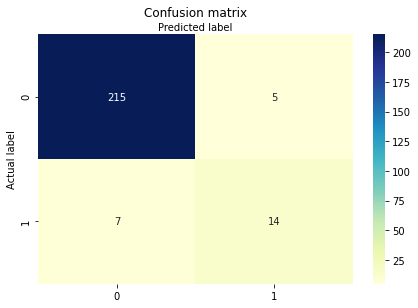

In [ ]:
draw_confusion_matrix(logistic_regression,test_X,test_y)

In [ ]:
roc_curve(test_y, logistic_regression.predict(test_X))

(array([0.        , 0.02272727, 1.        ]),
 array([0.        , 0.66666667, 1.        ]),
 array([2, 1, 0]))

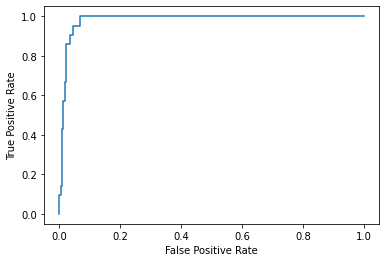

In [ ]:
y_pred_proba = logistic_regression.predict_proba(test_X)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_y,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print('roc score:',roc_auc_score(test_y,y_pred_proba))


roc score: 0.982034632034632


In [ ]:
compare_RMSE(logistic_regression,train_X, train_y,test_X,test_y)

Test set RMSE: 0.22314240099168053
CV RMSE: 0.21957751641341994
Training set RMSE: 0.152362350055011


In [ ]:
#random forest
random_forest, acc_random_forest,rf_mean_cv_score = classifier(RandomForestClassifier(n_estimators = 1000, max_depth = 5,  max_features = 10))

Cross Validation Scores are [0.91964286 0.95535714 0.91071429 0.94642857 0.95535714]
Average Cross Validation score :0.9375
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       220
           1       0.60      0.29      0.39        21

    accuracy                           0.92       241
   macro avg       0.77      0.63      0.67       241
weighted avg       0.91      0.92      0.91       241

accuracy:  0.921161825726141


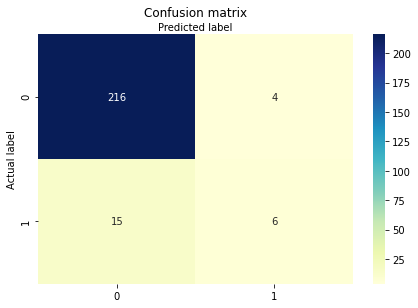

In [ ]:
draw_confusion_matrix(random_forest,test_X,test_y)

In [ ]:
compare_RMSE(random_forest,train_X, train_y,test_X,test_y)

Test set RMSE: 0.2807813638293306
CV RMSE: 0.23904572186687875
Training set RMSE: 0.11180339887498948


In [ ]:
importances = random_forest.feature_importances_
std = np.std([random_forest.feature_importances_ for tree in random_forest.estimators_], axis=0)

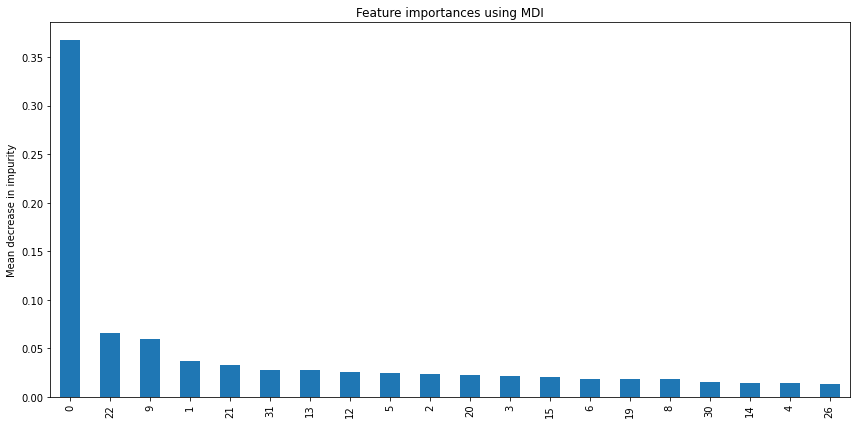

In [ ]:
forest_importances = pd.Series(importances, index=train_X.columns)
forest_importances = forest_importances.sort_values(ascending=False)
forest_importances = forest_importances[:20]
fig, ax = plt.subplots()

forest_importances.plot.bar(yerr=std[:20], ax=ax,figsize=(12, 6))
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### SGD

In [ ]:
#SGD
SGD, acc_sgd,SGD_mean_cv_score = classifier(SGDClassifier())

Cross Validation Scores are [0.9375     0.9375     0.91071429 0.92857143 0.94642857]
Average Cross Validation score :0.9321428571428572
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       220
           1       0.74      0.67      0.70        21

    accuracy                           0.95       241
   macro avg       0.85      0.82      0.84       241
weighted avg       0.95      0.95      0.95       241

accuracy:  0.950207468879668


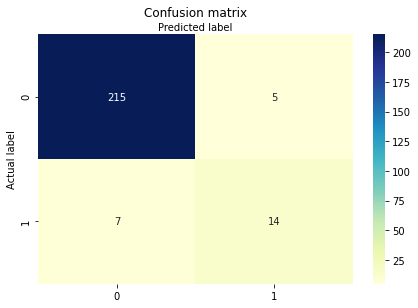

In [ ]:
draw_confusion_matrix(SGD,test_X,test_y)

In [ ]:
# Evaluate the model by comparing three RMSE's.
compare_RMSE(SGD,train_X, train_y,test_X,test_y)

Test set RMSE: 0.22314240099168053
CV RMSE: 0.24640269015229055
Training set RMSE: 0.16366341767699427


### decision tree

In [ ]:
#decision tree
decision_tree, acc_decision_tree, decision_tree_mean_cv_score= classifier(DecisionTreeClassifier())

Cross Validation Scores are [0.91071429 0.91964286 0.90178571 0.91964286 0.92857143]
Average Cross Validation score :0.9160714285714286
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       220
           1       0.47      0.43      0.45        21

    accuracy                           0.91       241
   macro avg       0.71      0.69      0.70       241
weighted avg       0.90      0.91      0.91       241

accuracy:  0.9087136929460581


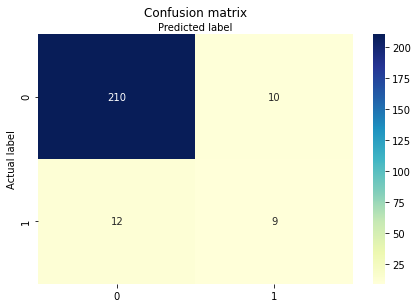

In [ ]:
draw_confusion_matrix(decision_tree,test_X,test_y)

In [ ]:
compare_RMSE(decision_tree,train_X, train_y,test_X,test_y)

Test set RMSE: 0.302136239226515
CV RMSE: 0.2958039891549808
Training set RMSE: 0.0


### SVC

In [ ]:
#Linear SVC
linear_SVC, acc_linear_svc,linear_SVC_mean_cv_score = classifier(LinearSVC(max_iter = 100))

Cross Validation Scores are [0.94642857 0.9375     0.92857143 0.9375     0.9375    ]
Average Cross Validation score :0.9375
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       220
           1       0.72      0.86      0.78        21

    accuracy                           0.96       241
   macro avg       0.85      0.91      0.88       241
weighted avg       0.96      0.96      0.96       241

accuracy:  0.9585062240663901


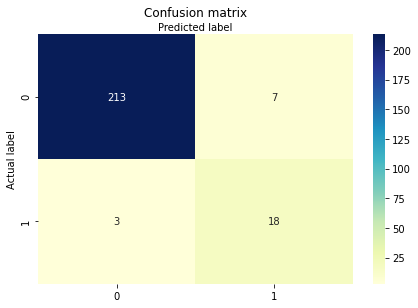

In [ ]:
draw_confusion_matrix(linear_SVC,test_X,test_y)

In [ ]:
compare_RMSE(linear_SVC,train_X, train_y,test_X,test_y)

Test set RMSE: 0.20370021093167762
CV RMSE: 0.22360679774997896
Training set RMSE: 0.17928429140015903


### GaussianNB


In [ ]:
#GaussianNB
gaussian_NB, acc_gnb,gaussian_NB_mean_cv_score = classifier(GaussianNB())

Cross Validation Scores are [0.91964286 0.94642857 0.9375     0.9375     0.97321429]
Average Cross Validation score :0.9428571428571428
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       220
           1       0.50      0.33      0.40        21

    accuracy                           0.91       241
   macro avg       0.72      0.65      0.68       241
weighted avg       0.90      0.91      0.90       241

accuracy:  0.9128630705394191


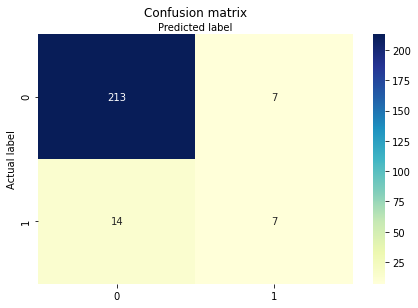

In [ ]:
draw_confusion_matrix(gaussian_NB,test_X,test_y)

In [ ]:
compare_RMSE(gaussian_NB,train_X, train_y,test_X,test_y)

Test set RMSE: 0.29518964998891967
CV RMSE: 0.2427520781138061
Training set RMSE: 0.1889822365046136


### KNeighbors Classifier


In [ ]:
#KNeighbors Classifier
kneighbors, acc_knn,kneighbors_mean_cv_score = classifier(KNeighborsClassifier())

Cross Validation Scores are [0.90178571 0.9375     0.94642857 0.9375     0.91071429]
Average Cross Validation score :0.9267857142857142
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       220
           1       0.83      0.24      0.37        21

    accuracy                           0.93       241
   macro avg       0.88      0.62      0.67       241
weighted avg       0.92      0.93      0.91       241

accuracy:  0.9294605809128631


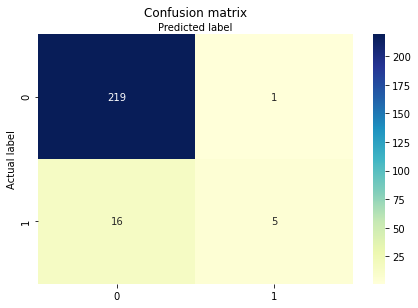

In [ ]:
draw_confusion_matrix(kneighbors,test_X,test_y)

In [ ]:
compare_RMSE(kneighbors,train_X, train_y,test_X,test_y)

Test set RMSE: 0.26559258100921596
CV RMSE: 0.26049403612586386
Training set RMSE: 0.2427520781138061


### Perceptron


In [ ]:
#Perceptron
perceptron, acc_perceptron,perceptron_mean_cv_score = classifier(Perceptron())

Cross Validation Scores are [0.96428571 0.91964286 0.92857143 0.91964286 0.94642857]
Average Cross Validation score :0.9357142857142857
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       220
           1       0.65      0.71      0.68        21

    accuracy                           0.94       241
   macro avg       0.81      0.84      0.82       241
weighted avg       0.94      0.94      0.94       241

accuracy:  0.941908713692946


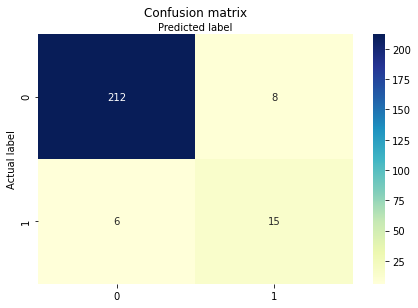

In [ ]:
draw_confusion_matrix(perceptron,test_X,test_y)

In [ ]:
compare_RMSE(perceptron,train_X, train_y,test_X,test_y)

Test set RMSE: 0.2410213399412051
CV RMSE: 0.2638993314558738
Training set RMSE: 0.21128856368212914


### All Model Accuracy

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Linear SVC', 
              'KNN', 'Decision Tree', 'Random Forest', 'Gaussain Naive Bayes', 
              'Perceptron', 'Stochastic Gradient Descent'],
    
    'Score': [acc_log_reg, acc_linear_svc, 
              acc_knn,  acc_decision_tree, acc_random_forest, acc_gnb, 
              acc_perceptron, acc_sgd],
    
     'Average CV score': [log_mean_cv_score, linear_SVC_mean_cv_score, 
              kneighbors_mean_cv_score,  decision_tree_mean_cv_score, rf_mean_cv_score, gaussian_NB_mean_cv_score, 
              perceptron_mean_cv_score, SGD_mean_cv_score]   
    
    })

models.sort_values(by='Score', ascending=False)

,Model,Score,Average CV score
1,Linear SVC,0.958506,0.937500
0,Logistic Regression,0.950207,0.948214
7,Stochastic Gradient Descent,0.950207,0.932143
6,Perceptron,0.941909,0.935714
2,KNN,0.929461,0.926786
4,Random Forest,0.921162,0.937500
5,Gaussain Naive Bayes,0.912863,0.942857
3,Decision Tree,0.908714,0.916071
